In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import lines, patches

import missingno as msno

import scipy
from scipy import stats
from scipy.stats import shapiro, kstest, normaltest

In [2]:
#read the dataframe
df = pd.read_csv(r'C:\Users\user\Documents\database purwadhika\capston_project 2\data\processed\cleaned_data.csv')
df.sample(5)

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept,discretizatingAge,discretizatingIncome
1473,3478,1971,PhD,52,Married,60585.0,1,1,2013-06-24,17,...,0,0,0,0,0,0,1,Accepted once or more,Late middle-aged adults,$34948.5 - $67793.5
899,9760,1963,PhD,60,Widow,52278.0,0,1,2013-01-25,24,...,0,0,0,0,0,0,1,Accepted once or more,Late middle-aged adults,$34948.5 - $67793.5
443,4947,1966,Master,57,Single,89572.0,0,0,2012-09-15,44,...,0,1,0,1,0,0,1,Accepted once or more,Late middle-aged adults,> $67793.5
1967,1406,1975,Graduation,48,Single,53201.0,1,1,2013-02-12,49,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$34948.5 - $67793.5
2176,9014,1975,Graduation,48,Married,37085.0,1,1,2014-06-26,65,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$34948.5 - $67793.5


In [3]:
# Cek data type, null value, unique value for each variable
print(f'Total rows {df.shape[0]}, Total Colum {df.shape[1]}')
pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Total rows 2240, Total Colum 32


,feature,data_type,null_value,n_unique,sample_unique
0,ID,int64,0.0,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,0.0,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,object,0.0,4,"[Graduation, PhD, Master, Basic]"
3,Age,int64,0.0,59,"[66, 69, 58, 39, 42, 56, 52, 38, 49, 73, 47, 6..."
4,Marital_Status,object,0.0,8,"[Single, Together, Married, Divorced, Widow, A..."
5,Income,float64,0.0,1984,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
6,Kidhome,int64,0.0,3,"[0, 1, 2]"
7,Teenhome,int64,0.0,3,"[0, 1, 2]"
8,Dt_Customer,object,0.0,663,"[2012-09-04, 2014-03-08, 2013-08-21, 2014-02-1..."
9,Recency,int64,0.0,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 5..."


### **DATA ANALYSIS**

For analyzing the data, we start to separate the data into four section:

- **Customer Description**
    
    In customer description section we will take the column data that could be affected to **the customer behavior**. It is like marital status, income, age, education level, kid's and teen's possession. For column income and age we will use the data that we have discretized.

- **Goods**

    In goods section we will analyze the column that contains categories of goods that can be bought in supermarkets (Wines, Fruits, Meat, Fish, Sweet, Gold)
    
- **Place**

    It is contains that place we could to buy the goods from the supermarket, can be said to include both of online and offline stores (Offline store, web, catalog). 
    
- **Campaign**

    It will be contains all of the campaign that the supermarkets has done with customers

##### **THE PROBLEM**

1. How effective was the campaign when compared to total sales?

2. How to increase 10% of sales on goods viewed from customer purchase history which is influenced by **customer behavior**?

3. How to increase 10% of sales on places viewed from customer purchase history which is influenced by **customer behavior**?



## **SOLVE THE PROBLEM**

Before we analyze the data, we need to sparate the data that customer never accepted the campaign and have accepted the campaign once or more. In our opinion this is could be more effective to solve the first and second problem, because the customers who does not get a campaign means a customer who really needs the item and does not buy it for the reason of getting a campaign.

In [4]:
# separating the customers that never accepted the campaign and have accepted the campaign once or more
dfNoAccCamp = df[df['campaignAccept'] == 'Never Accepted']
dfAccCamp = df[df['campaignAccept'] == 'Accepted once or more']

### 1. How effective was the campaign when compared to total sales?

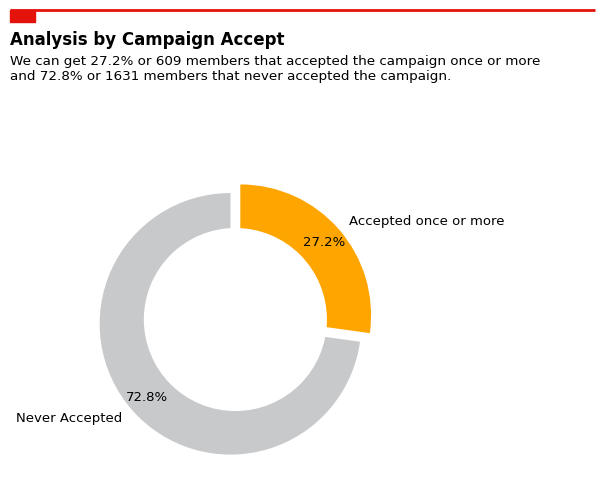

In [5]:
# calculate the customers that have accepted campaign once or more and the customers that never accepted
valueAccCamp = df['campaignAccept'].value_counts()
valueAccCamp1 = df['campaignAccept'].value_counts().reset_index()

# initialize plot
fig, ax = plt.subplots(figsize=(5, 5))

# adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.9)

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1.17], [1.12, 1.12], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.095), 0.05, 0.025, color='#E3120B'))

# add title
fig.text(
    0, 1.05, "Analysis by Campaign Accept", 
    fontsize=12,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, 0.98, 
    f'''We can get 27.2% or {valueAccCamp1['count'][1]} members that accepted the campaign once or more 
and 72.8% or {valueAccCamp1['count'][0]} members that never accepted the campaign.''',
    fontsize=9.7, 
    color='black'
)

# create pie chart
plt.pie(valueAccCamp, 
        colors=["#C7C9CB", '#FFA500'],
        labels=['Never Accepted', 'Accepted once or more' ], 
        autopct='%1.1f%%', 
        startangle=90, 
        pctdistance=0.85, 
        explode=(0.05, 0.05),
        textprops = {"fontsize": 9.5},
)

# create a circle at the center of the plot
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0, 0), 0.7, fc='white'))

# # saving figure
# plt.savefig('../reports/figures/station.jpg', bbox_inches='tight')

# show
plt.tight_layout()
plt.show()

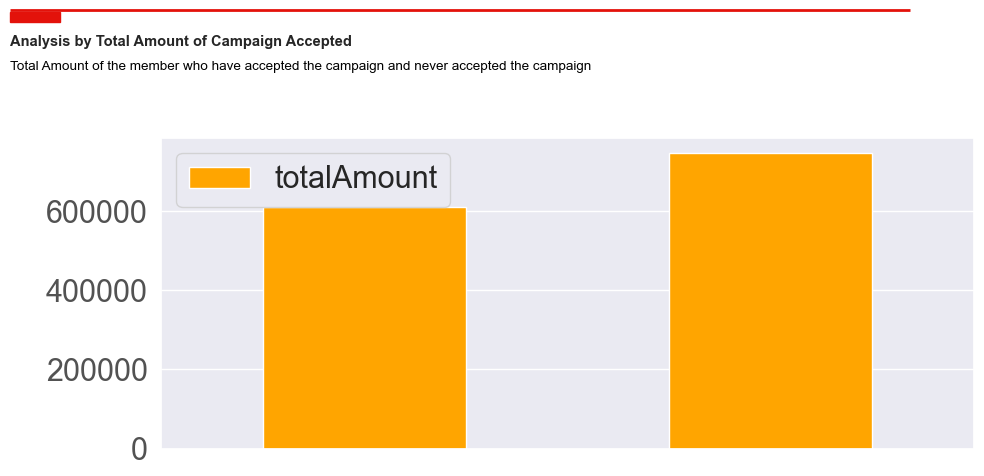

In [58]:
# Graphical total amount of member who have accepted campaign and never accepted the campaign
PivotCamp = df.pivot_table(index=['campaignAccept'],
                            values=['totalAmount'], 
                            aggfunc={'totalAmount' : 'sum'}
                            )
PivotCamp

# initialize plot
fig, ax = plt.subplots()

# adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.9, left=0.2)

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.9], [1.23, 1.23], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.2), 0.05, 0.025, color='#E3120B'))

# add title
fig.text(
    0, 1.14, "Analysis by Total Amount of Campaign Accepted", 
    fontsize=10.5,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, 1.08, 
    "Total Amount of the member who have accepted the campaign and never accepted the campaign", 
    fontsize=9.7, 
    color='black'
)

ax = PivotCamp.plot.bar(
    align='center', 
    stacked=True, 
    figsize=(10, 4), 
    color=['#FFA500'], 
    ax=ax, 
)

# # customize axes spine
# ax.spines["right"].set_visible(False)
# ax.spines["top"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# ax.spines["left"].set_lw(1.5)

# customize ticks and label
plt.yticks(color='#525252')
plt.ylabel(ylabel=None)
plt.xticks(ticks=[])
plt.xlabel(xlabel=None)

# # saving figure
# plt.savefig('../reports/figures/bike.jpg', bbox_inches='tight')

# show
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_26468\2441475436.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


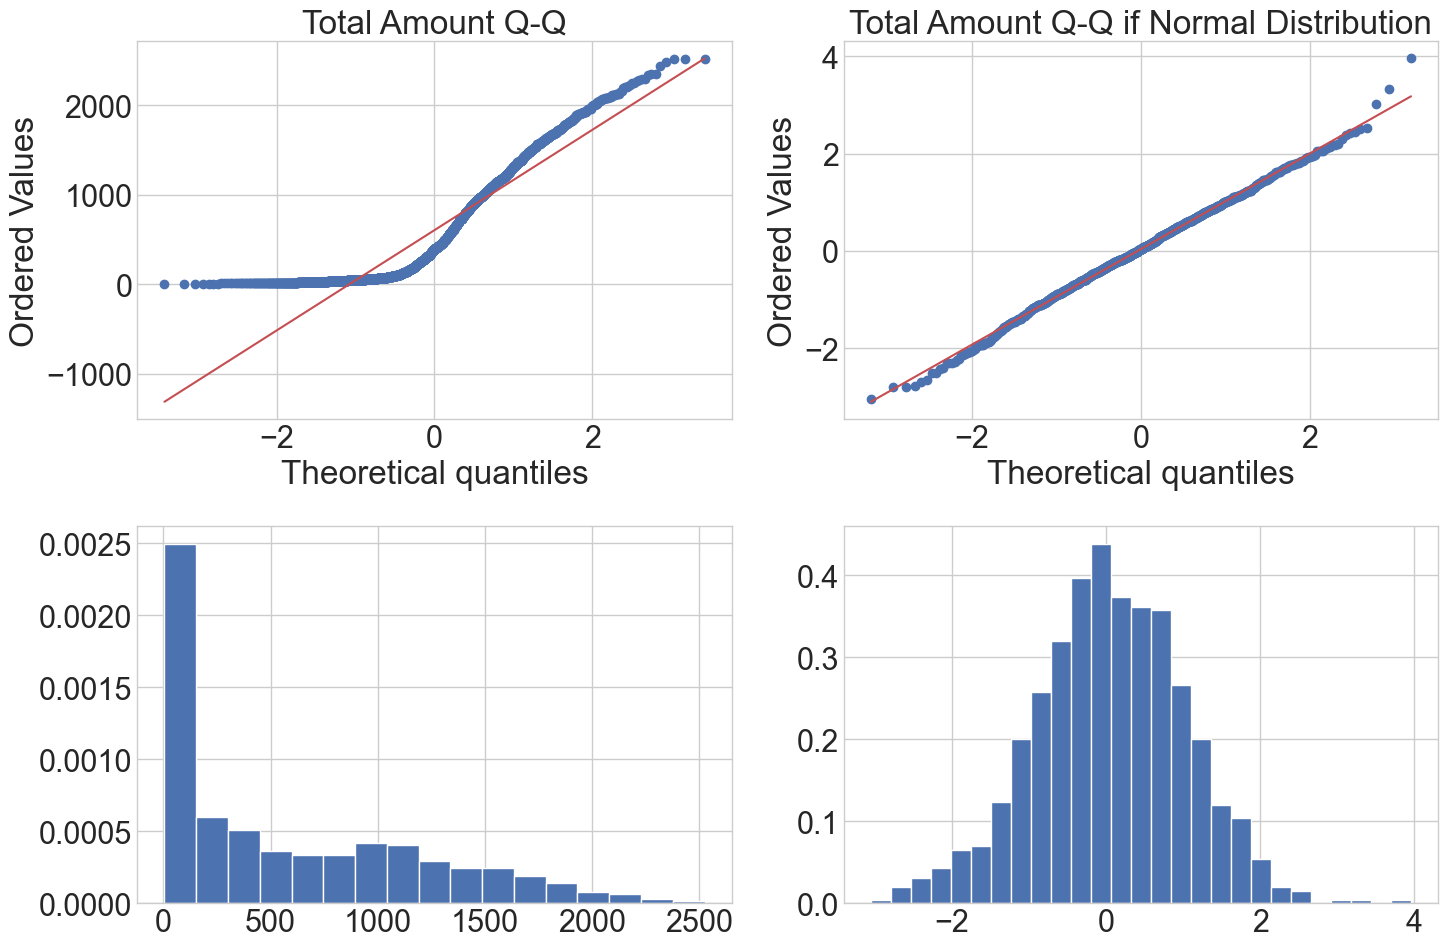

In [66]:
# Graphical test for known the distribution total amount
plt.style.use('seaborn-whitegrid')

dataFill = df['totalAmount']
datanorm = stats.norm.rvs(size=1000, random_state=1)

fig, axes= plt.subplots(2,2 , figsize=(15, 10))

# Q-Q plot
stats.probplot(dataFill, dist=stats.norm, plot=axes[0, 0])
stats.probplot(datanorm, dist=stats.norm, plot=axes[0, 1])

axes[0, 0].set_title('Total Amount Q-Q')
axes[0, 1].set_title('Total Amount Q-Q if Normal Distribution')
axes[1, 0].hist(dataFill, density=True, bins='auto')
axes[1, 1].hist(datanorm, density=True, bins='auto')

fig.tight_layout()

**Measure of Central Tendency of The Data's**

Because the distribution of the total amount's Data is **not normal**, the measure of central tendency of the Data is **median**. We should be doing hypotesis testing for proportion ***Two Sample Z-Test*** for test efectivity of the campain for statistical test. Before testing, we should to separate the data into two categorical variable that divided by the median of the data.

**HYPOTHESIS**

- H0 : Proportion of total amount with the Campaign = Proportion of total amount without the Campaign
- Ha : proportion of total amount witt the Campaign > Proportion of total amount without the Campaign

In [70]:
# find the median and separate the total amount

IncomeMed = df.totalAmount.median()

# discretization Income by median 
def discTotalAmount(df):
    if df.totalAmount < IncomeMed:
        return "LowMid"
    else:
        return "MidHigh"
    
df['discTotalAmount'] = df.apply(discTotalAmount, axis=1)

In [72]:
# number of spent category
PivotCamp2 = df[['campaignAccept','discTotalAmount']].pivot_table(
    index= 'campaignAccept',
    columns= 'discTotalAmount',
    values= 'discTotalAmount',
    aggfunc= len
)

PivotCamp2

discTotalAmount,LowMid,MidHigh
campaignAccept,,
Accepted once or more,161,448
Never Accepted,957,674


In [81]:
# number of accept campaign and Mid-High amount
nMidHighAcc = PivotCamp2.loc['Accepted once or more', 'MidHigh']

# number of never accept campaign and Mid-High amount
nMidHighNever = PivotCamp2.loc['Accepted once or more', 'MidHigh']

# number of accept customers
nAcc = PivotCamp2.sum(axis=1)['Accepted once or more']

# number of never accept customers
nNever = PivotCamp2.sum(axis=1)['Never Accepted']

from statsmodels.stats.proportion import proportions_ztest 
stat, pvalue = proportions_ztest(
    count= [nMidHighAcc, nMidHighNever],   # jml pembelian di kelompok new dan kelompok old
    nobs= [nAcc, nNever],                  # jumlah seluruh kelompok new dan jumlah seluruh kelompok old
    alternative='larger'                   # Ha (lebih besar)
)

pvalue/2
pvalue

1.1359337713483676e-87

In [82]:
# conclusion

if pvalue > 0.05:
    print(f'''
    Pvalue = {pvalue}. Pvalue > 0.05. Failure to reject Ho.
    We do not have enough evidence to say that the Proportion of total amount with the Campaign is larger between
    Proportion of total amount without the Campaign.
    (The proportions are NOT significantly different)
    ''')

else:
    print(f'''
    Pvalue = {pvalue}. Pvalue <= 0.05. Success to reject Ho.
    We have enough evidence to say that the Proportion of total amount with the Campaign is larger between
    Proportion of total amount without the Campaign.
    (The proportions are significantly different)
    ''')


    Pvalue = 1.1359337713483676e-87. Pvalue <= 0.05. Success to reject Ho.
    We have enough evidence to say that the Proportion of total amount with the Campaign is larger between
    Proportion of total amount without the Campaign.
    (The proportions are significantly different)
    


##### ***Insight*** 
Although only 27.2% of members received the campaign, we can say that the campaign that has been carried out is quite effective, this can be proven by hypothesis testing for the proportion of Two Sample Z-Test which produces a p-value = 1.1359337713483676e-87
.

In [9]:
# a = df[df['campaignAccept'] == 'Never Accepted']
# b = df[~df['campaignAccept'] == 'Never Accepted']

# asample = a.sample(50)
# bsample = b.sample(50)

# # # number of spent category
# # df_pivot = df[['accept_campaign','spent_category']].pivot_table(
# #     index= 'accept_campaign',
# #     columns= 'spent_category',
# #     values= 'spent_category',
# #     aggfunc= len
# # )

# # df_pivot
# asample

In [10]:
# dftest = df[['Marital_Status', 'Kidhome','Education', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'campignAccept' , 'discretizatingAge', 'discretizatingIncome']]
# # heatmap of variable correlation 
# fig, ax = plt.subplots(num= 15, figsize=(30, 20))
# phik_overview = dftest.phik_matrix()
# corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
# sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f')
# plt.show()

# # heatmap of variable significance
# fig, ax = plt.subplots(num= 15, figsize=(30, 20))
# significance_overview = dftest.significance_matrix()
# corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
# sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f')
# plt.show()


# plt.tight_layout()


### 2. How to increase 10% of sales on goods viewed from customer purchase history which is influenced by **customer behavior**?

In [83]:
# # Check the correlation and signification using phik 

# # separating the column that we need beetween customer description(CD) and Goods
# dfCDGoods = dfNoAccCamp[['discretizatingAge', 'discretizatingIncome','Marital_Status', 'Kidhome','Education', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
# # heatmap of variable correlation 
# fig, ax = plt.subplots(figsize=(30, 20))
# phik_overview = dfCDGoods.phik_matrix()
# corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
# sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f', annot_kws={"fontsize":30})
# sns.set(font_scale=3)
# plt.show()

# # heatmap of variable significance
# fig, ax = plt.subplots(figsize=(30, 20))
# significance_overview = dfCDGoods.significance_matrix()
# corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
# sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f', annot_kws={"fontsize":30})
# sns.set(font_scale=3)
# plt.show()


To analyze the data we use the dataframe that the members nerver accepted the campaign. 
And the step of analyze the data is:

1. First we need to know how much total amount from all of the member. 
2. Calculate the target (increase 25% from total amount).
3. Find the Good that has higher values amount between others 
4. Find the customer description that has higher values amount on the Goods Higher Amount.
5. Find the place that 'customer higher values amount' was buying in the supermarket

In [157]:
# find the total amount from all of the member
totalAmount = dfNoAccCamp['totalAmount'].sum()

# find the target
targetAmount = totalAmount*10/100

print(f'''Total Amount from all of the member: {totalAmount}, 
and the target of amount to increase 25%: {targetAmount}''')


Total Amount from all of the member: 747176, 
and the target of amount to increase 25%: 74717.6


<Axes: >

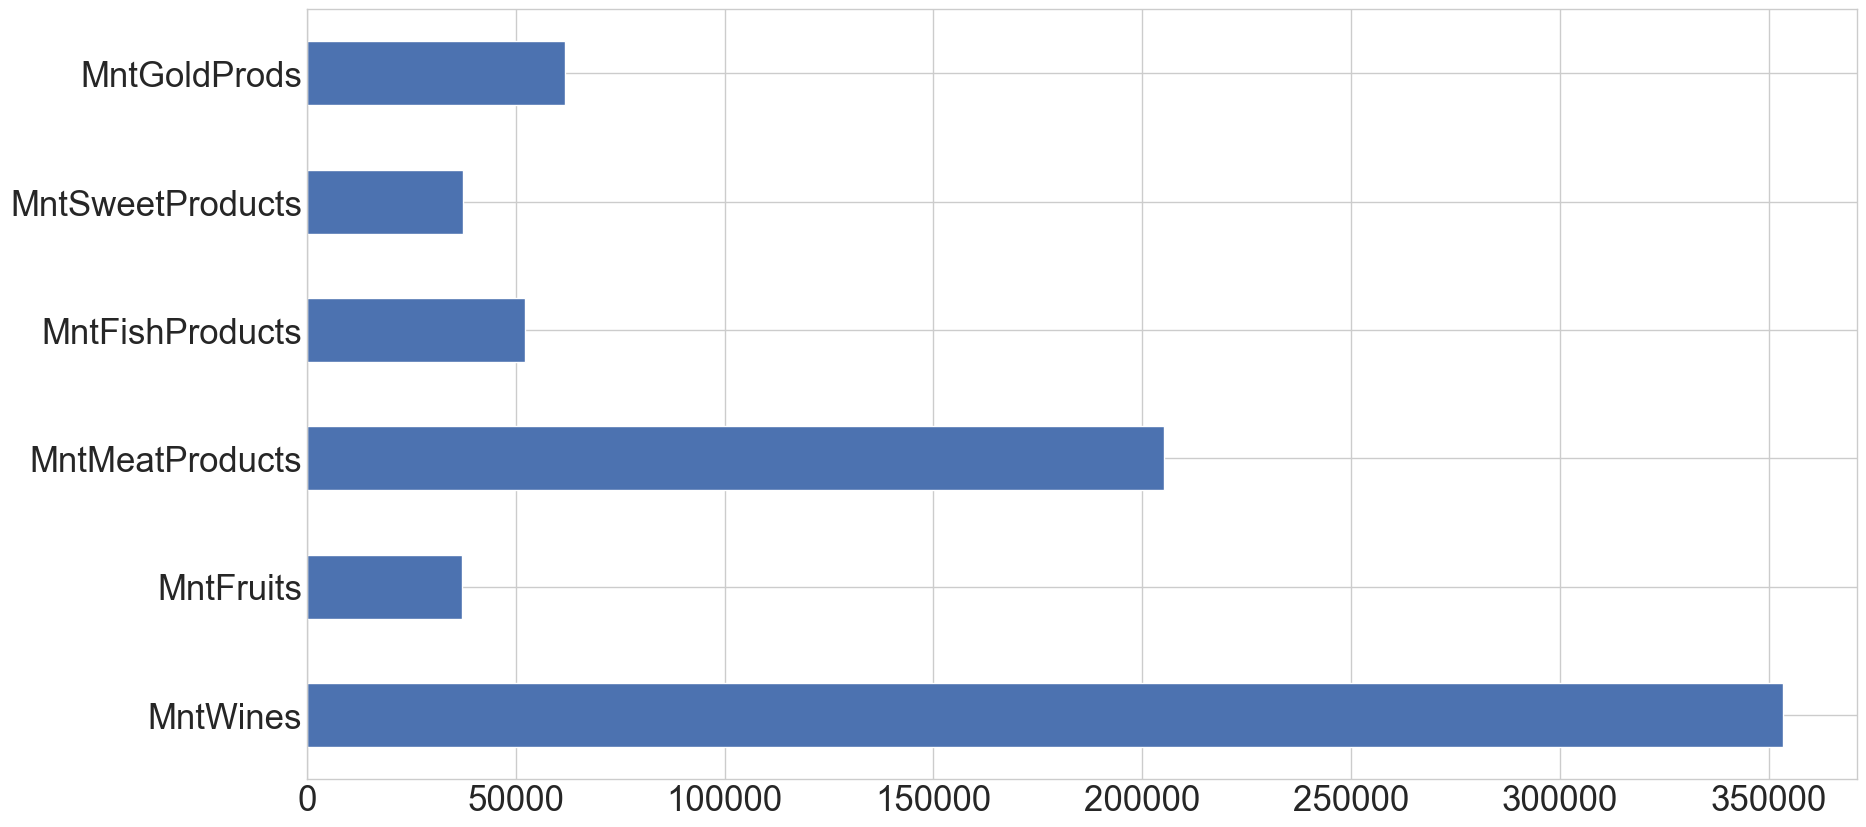

In [101]:
# find the goods that has higher values
dfTopGoods = dfNoAccCamp[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
dfTopGoods.plot(kind='barh', figsize=[20,10], fontsize=25)

In [126]:
dfTopGoods.max()

353443

In [132]:
for i in dfTopGoods:
    if i == dfTopGoods.max():
        print(f'After we calculated and graphical tested we have know the goods\nthat have higher values between others is Wines with total amount: {i}')
        break


After we calculated and graphical tested we have know the goods
that have higher values between others is Wines with total amount: 353443


In [139]:
# find the customer description that has higher values amount in the wine goods.
dfWines = dfNoAccCamp[dfNoAccCamp['MntWines'] != 0]
dfWinesCal = dfWines.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'MntWines':'sum', 'ID' : 'count'}).sort_values('MntWines', ascending=False).reset_index()
dfWinesCal.nlargest(5, columns='MntWines')

,discretizatingAge,discretizatingIncome,Education,Marital_Status,Kidhome,Teenhome,MntWines,ID
0,Late middle-aged adults,$34948.5 - $67793.5,Graduation,Married,0,1,10713,28
1,Early middle-aged adults,$34948.5 - $67793.5,Graduation,Married,0,1,8615,25
2,Late middle-aged adults,$34948.5 - $67793.5,PhD,Married,0,1,7384,19
3,Late middle-aged adults,$34948.5 - $67793.5,Graduation,Together,0,1,7045,18
4,Older Adults,$34948.5 - $67793.5,Graduation,Married,0,1,6610,22


In [173]:
# Find the place that 'customer higher values amount' was buying in the supermarket
dfPlaceBuyWines = dfNoAccCamp.loc[(dfNoAccCamp.discretizatingAge == 'Late middle-aged adults') & (dfNoAccCamp.discretizatingIncome == '$34948.5 - $67793.5') & (dfNoAccCamp.Education == 'Graduation') & (dfNoAccCamp.Marital_Status == 'Married') & (dfNoAccCamp.Kidhome == 0) & (dfNoAccCamp.Teenhome == 1) & (dfNoAccCamp.MntWines != 0)] 
dfPlaceBuyWines[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

NumWebPurchases        169
NumCatalogPurchases     80
NumStorePurchases      201
dtype: int64

In [178]:
# to validate how many of the 'customer higher values amount' was buying in the store of supermarket
dfPlaceBuyWines2 = dfNoAccCamp.loc[(dfNoAccCamp.discretizatingAge == 'Late middle-aged adults') & (dfNoAccCamp.discretizatingIncome == '$34948.5 - $67793.5') & (dfNoAccCamp.Education == 'Graduation') & (dfNoAccCamp.Marital_Status == 'Married') & (dfNoAccCamp.Kidhome == 0) & (dfNoAccCamp.Teenhome == 1) & (dfNoAccCamp.MntWines != 0) & (dfNoAccCamp.NumStorePurchases != 0)]

if len(dfPlaceBuyWines2) == dfWinesCal.ID[0]:
    print("All of the 'customer higher values amount' was buying in the store")
else: 
    print(f"There are {dfWinesCal.ID[0]-len(dfPlaceBuyWines2)} of the 'customer higher values amount'never buying in the store")

All of the 'customer higher values amount' was buying in the store


In [202]:
# find the probability as seen from customer description that has higher value in wines
prob = dfWinesCal.ID[0]/dfWinesCal.ID.sum()
prob*2240

38.73996294008647

In [206]:
# DataFrame based on customer description who has the higher value amount of the wines
dfCIWines = dfNoAccCamp.loc[(dfNoAccCamp.discretizatingAge == 'Late middle-aged adults') & (dfNoAccCamp.discretizatingIncome == '$34948.5 - $67793.5') & (dfNoAccCamp.Education == 'Graduation') & (dfNoAccCamp.Marital_Status == 'Married') & (dfNoAccCamp.Kidhome == 0) & (dfNoAccCamp.Teenhome == 1)]

mean = dfCIWines.MntWines.mean()
std = dfCIWines.MntWines.std()
# get the lowerbound and upperbound
lower = mean - 1.96 * std / np.sqrt(len(dfCIWines))
upper = mean + 1.96 * std / np.sqrt(len(dfCIWines))
print(f"Confidence interval for mean total amount of Wine is between {round(lower, 2)} and {round(upper, 2)}")

# action to achieve the target, find how many customers that we need to achieve the target
NeedCust = targetAmount/lower

print(f"And to achieve the target we need {int(np.ceil(NeedCust))} more customer for buying the wines")


Confidence interval for mean total amount of Wine is between 298.41 and 466.8
And to achieve the target we need 251 more customer for buying the wines


In [209]:
# Find how many people that we should to promote in order to find the target customer(251)
NeedPeople = NeedCust/prob
print(f"We need {int(np.ceil(NeedPeople))} to get target customer ({int(np.ceil(NeedCust))}) for achieve the target")

We need 14478 to get target customer (251) for achieve the target


In [13]:
dfFruits = dfNoAccCamp[dfNoAccCamp['MntFruits'] != 0]
dfFruitsCal = dfFruits.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'MntFruits':'sum', 'ID' : 'count'})
dfFruitsCal.sort_values('MntFruits', ascending=False)

MntFruits   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome              
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1              1083  \
                         > $67793.5           Graduation Single         0       0               891   
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1               846   
Early middle-aged adults > $67793.5           Graduation Married        0       0               756   
Late middle-aged adults  $34948.5 - $67793.5  Graduation Together       0       1               699   
...                                                                                             ...   
Older Adults             $0 - $34948.5        Master     Widow          0       0                 1   
                                              PhD        Widow          1       1                 1   
Early middle-aged adults $34948.5 - $67793.5  Graduation Divorced       2       0                 1   
Older Adults             $34948.5 - $67793.5  Master     Single         2       1                 1   
                         $0 - $34948.5        Graduation Together       2       1                 1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         23  
                         > $67793.5           Graduation Single         0       0         11  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         19  
Early middle-aged adults > $67793.5           Graduation Married        0       0         12  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Together       0       1         15  
...                                                                                       ..  
Older Adults             $0 - $34948.5        Master     Widow          0       0          1  
                                              PhD        Widow          1       1          1  
Early middle-aged adults $34948.5 - $67793.5  Graduation Divorced       2       0          1  
Older Adults             $34948.5 - $67793.5  Master     Single         2       1          1  
                         $0 - $34948.5        Graduation Together       2       1          1  

[384 rows x 2 columns]

In [14]:
dfFish = dfNoAccCamp[dfNoAccCamp['MntFishProducts'] != 0]
dfFishCal = dfFish.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'MntFishProducts':'sum', 'ID' : 'count'})
dfFishCal.sort_values('MntFishProducts', ascending=False)

MntFishProducts   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome                    
Early middle-aged adults > $67793.5           Graduation Married        0       0                    1301  \
Late middle-aged adults  > $67793.5           Graduation Together       0       0                    1240   
                         $34948.5 - $67793.5  Graduation Married        0       1                    1097   
                         > $67793.5           Graduation Married        0       0                    1013   
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1                     995   
...                                                                                                   ...   
Older Adults             $34948.5 - $67793.5  PhD        Widow          0       1                       2   
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        2       0                       2   
Early middle-aged adults > $67793.5           PhD        Together       1       1                       2   
Older Adults             $0 - $34948.5        PhD        Together       0       1                       2   
Late middle-aged adults  $0 - $34948.5        PhD        Married        1       1                       1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Early middle-aged adults > $67793.5           Graduation Married        0       0         12  
Late middle-aged adults  > $67793.5           Graduation Together       0       0         10  
                         $34948.5 - $67793.5  Graduation Married        0       1         22  
                         > $67793.5           Graduation Married        0       0         10  
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         22  
...                                                                                       ..  
Older Adults             $34948.5 - $67793.5  PhD        Widow          0       1          1  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        2       0          1  
Early middle-aged adults > $67793.5           PhD        Together       1       1          1  
Older Adults             $0 - $34948.5        PhD        Together       0       1          1  
Late middle-aged adults  $0 - $34948.5        PhD        Married        1       1          1  

[389 rows x 2 columns]

In [15]:
dfSweet = dfNoAccCamp[dfNoAccCamp['MntSweetProducts'] != 0]
dfSweetCal = dfSweet.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'MntSweetProducts':'sum', 'ID' : 'count'})
dfSweetCal.sort_values('MntSweetProducts', ascending=False)

MntSweetProducts   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome                     
Early middle-aged adults > $67793.5           Graduation Married        0       0                     1089  \
                         $34948.5 - $67793.5  Graduation Married        0       1                     1017   
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1                     1006   
Early middle-aged adults > $67793.5           Graduation Married        0       1                      652   
Late middle-aged adults  > $67793.5           Graduation Married        0       0                      616   
...                                                                                                    ...   
                         $34948.5 - $67793.5  Graduation Divorced       1       2                        1   
Early middle-aged adults $0 - $34948.5        PhD        Married        1       1                        1   
                         $34948.5 - $67793.5  Graduation Together       2       1                        1   
                         $0 - $34948.5        PhD        Divorced       1       1                        1   
                         $34948.5 - $67793.5  PhD        Divorced       1       1                        1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Early middle-aged adults > $67793.5           Graduation Married        0       0         10  
                         $34948.5 - $67793.5  Graduation Married        0       1         22  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         24  
Early middle-aged adults > $67793.5           Graduation Married        0       1          7  
Late middle-aged adults  > $67793.5           Graduation Married        0       0         10  
...                                                                                       ..  
                         $34948.5 - $67793.5  Graduation Divorced       1       2          1  
Early middle-aged adults $0 - $34948.5        PhD        Married        1       1          1  
                         $34948.5 - $67793.5  Graduation Together       2       1          1  
                         $0 - $34948.5        PhD        Divorced       1       1          1  
                         $34948.5 - $67793.5  PhD        Divorced       1       1          1  

[381 rows x 2 columns]

In [16]:
dfGold = dfNoAccCamp[dfNoAccCamp['MntGoldProds'] != 0]
dfGoldCal = dfGold.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'MntGoldProds':'sum', 'ID' : 'count'})
dfGoldCal.sort_values('MntGoldProds', ascending=False)

MntGoldProds   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome                 
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1                 2160  \
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1                 1521   
Late middle-aged adults  $34948.5 - $67793.5  Graduation Together       0       1                 1289   
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1                 1173   
                         > $67793.5           Graduation Married        0       0                 1134   
...                                                                                                ...   
Older Adults             $0 - $34948.5        Graduation Together       2       1                    1   
Early middle-aged adults $34948.5 - $67793.5  Graduation Divorced       2       0                    1   
Late middle-aged adults  $0 - $34948.5        PhD        Married        2       0                    1   
Older Adults             $34948.5 - $67793.5  Graduation Married        1       2                    1   
                         $0 - $34948.5        Graduation Divorced       2       1                    1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         27  
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1         22  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Together       0       1         18  
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         25  
                         > $67793.5           Graduation Married        0       0         12  
...                                                                                       ..  
Older Adults             $0 - $34948.5        Graduation Together       2       1          1  
Early middle-aged adults $34948.5 - $67793.5  Graduation Divorced       2       0          1  
Late middle-aged adults  $0 - $34948.5        PhD        Married        2       0          1  
Older Adults             $34948.5 - $67793.5  Graduation Married        1       2          1  
                         $0 - $34948.5        Graduation Divorced       2       1          1  

[417 rows x 2 columns]

### 2. How to increase 25% of sales on places viewed from customer purchase history which is influenced by **customer behavior**?

interval columns not set, guessing: ['Kidhome', 'Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']


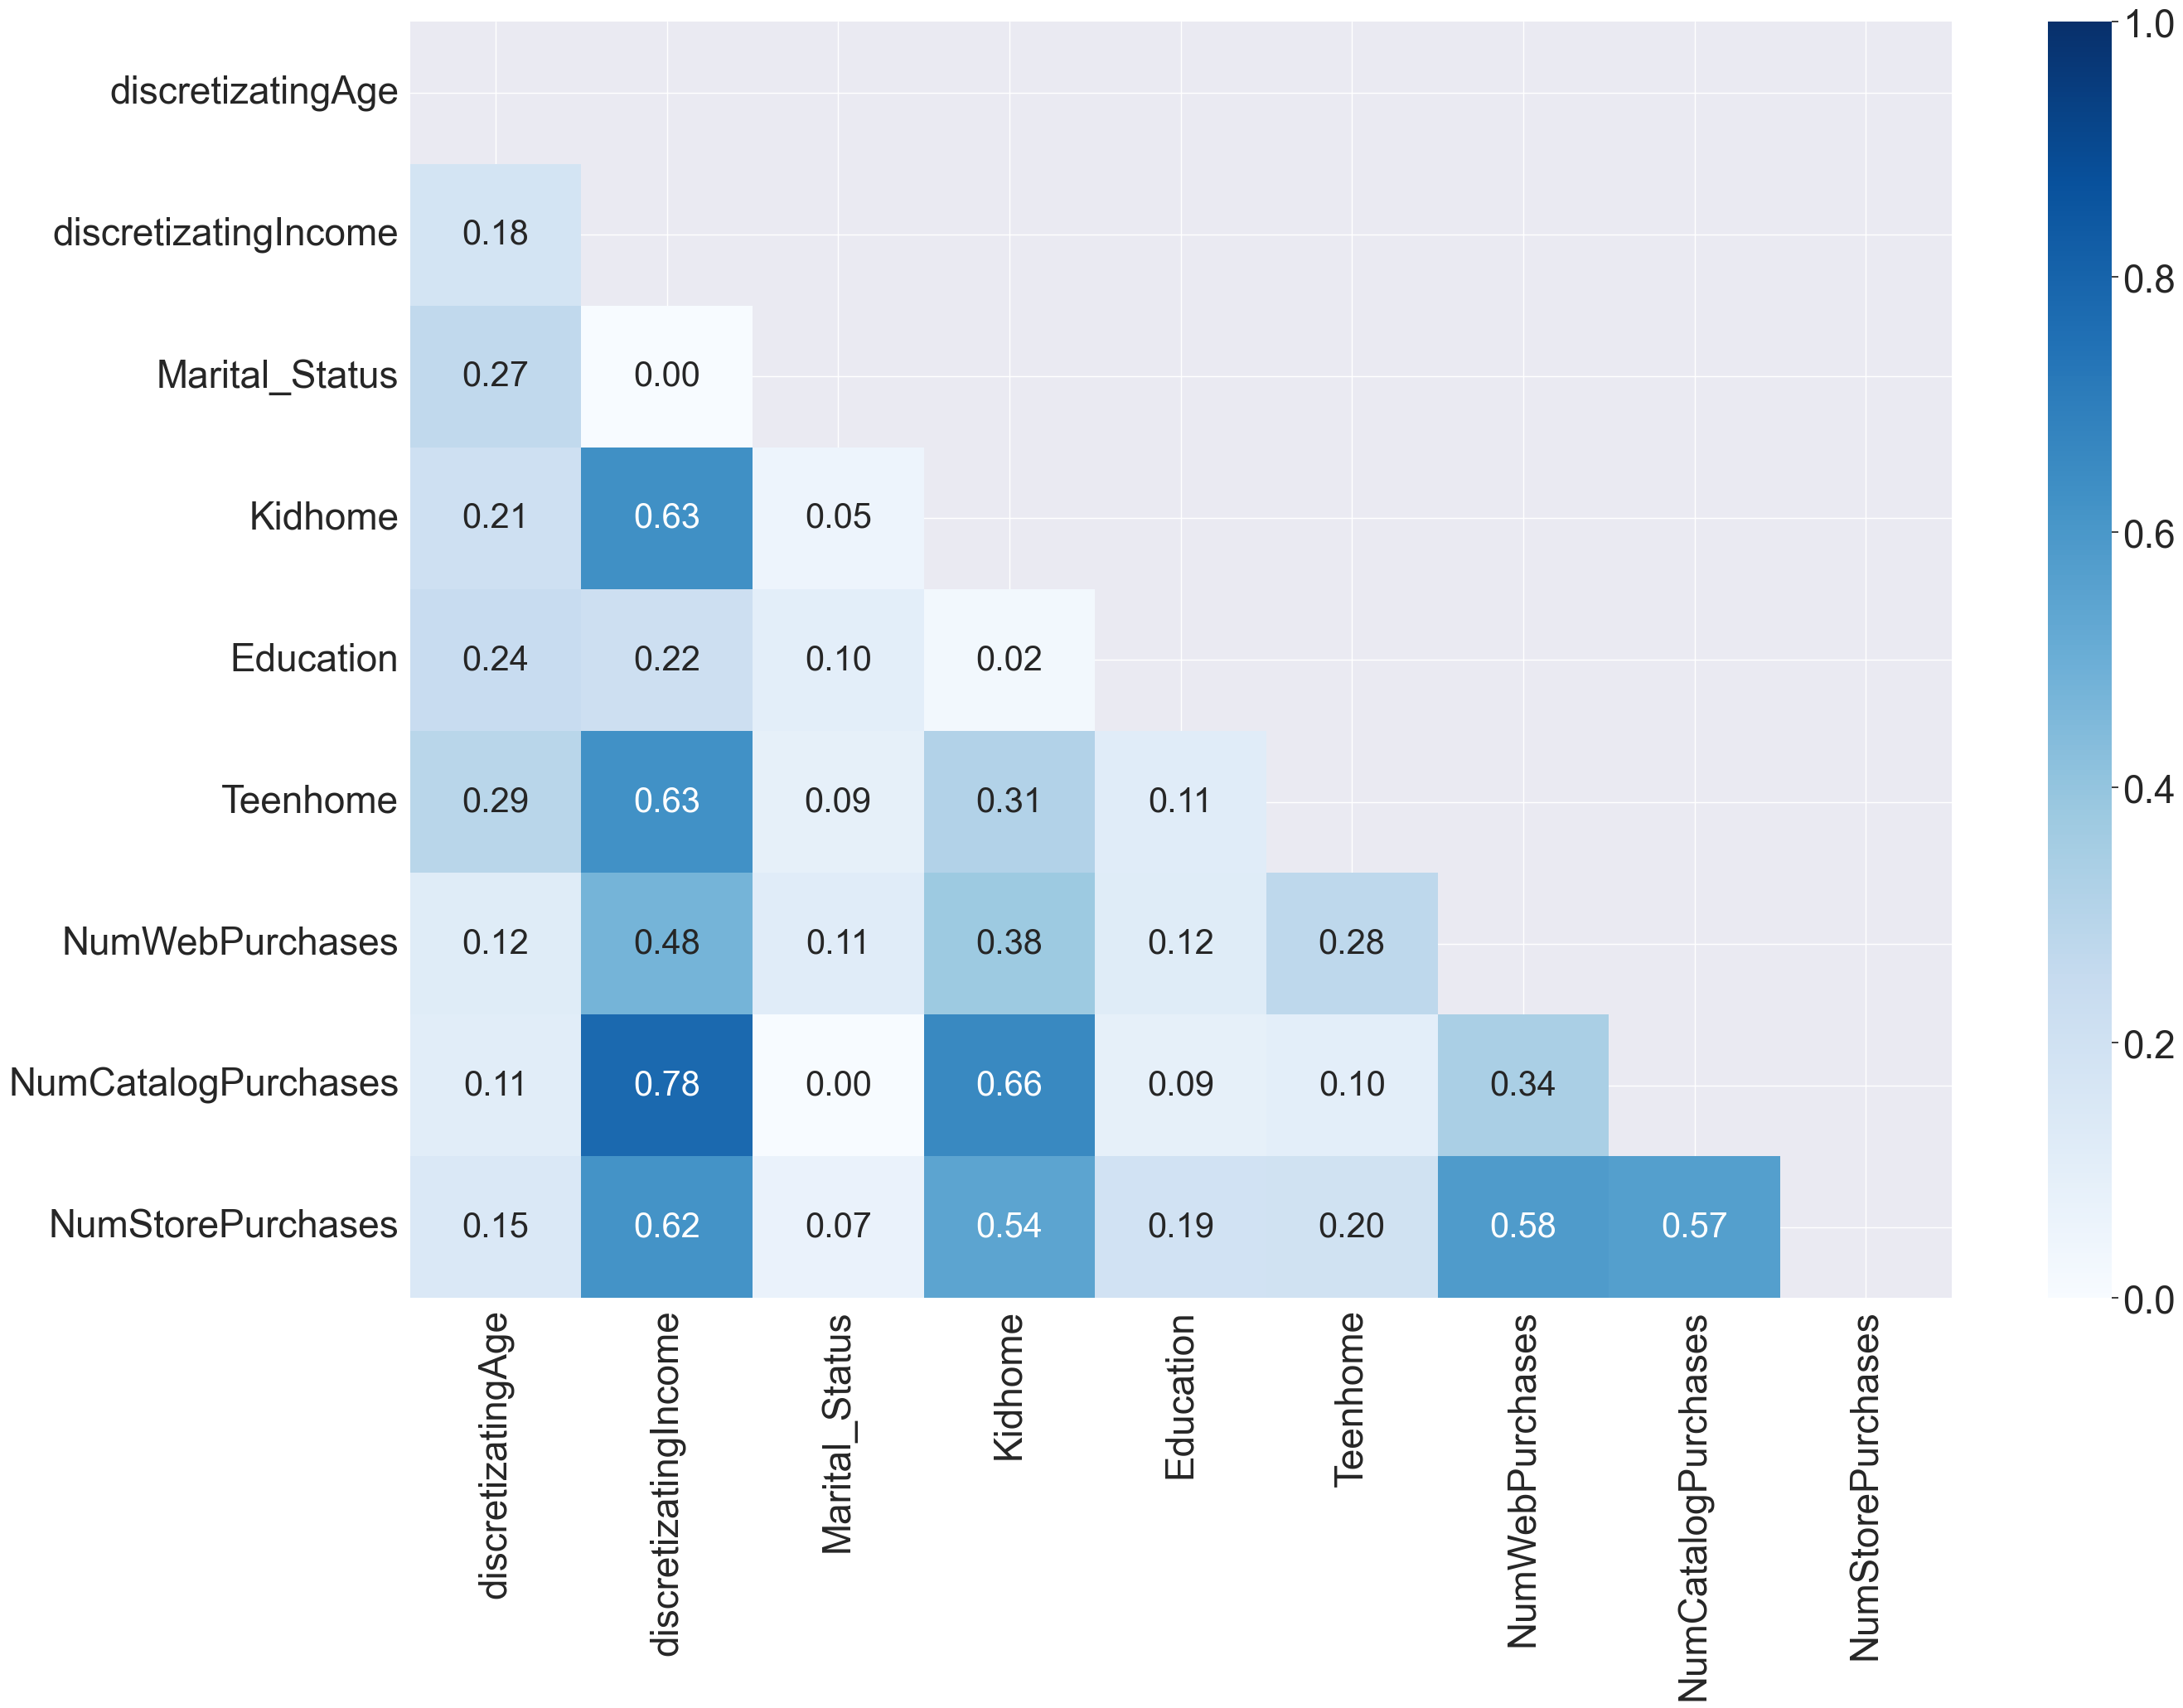

interval columns not set, guessing: ['Kidhome', 'Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']


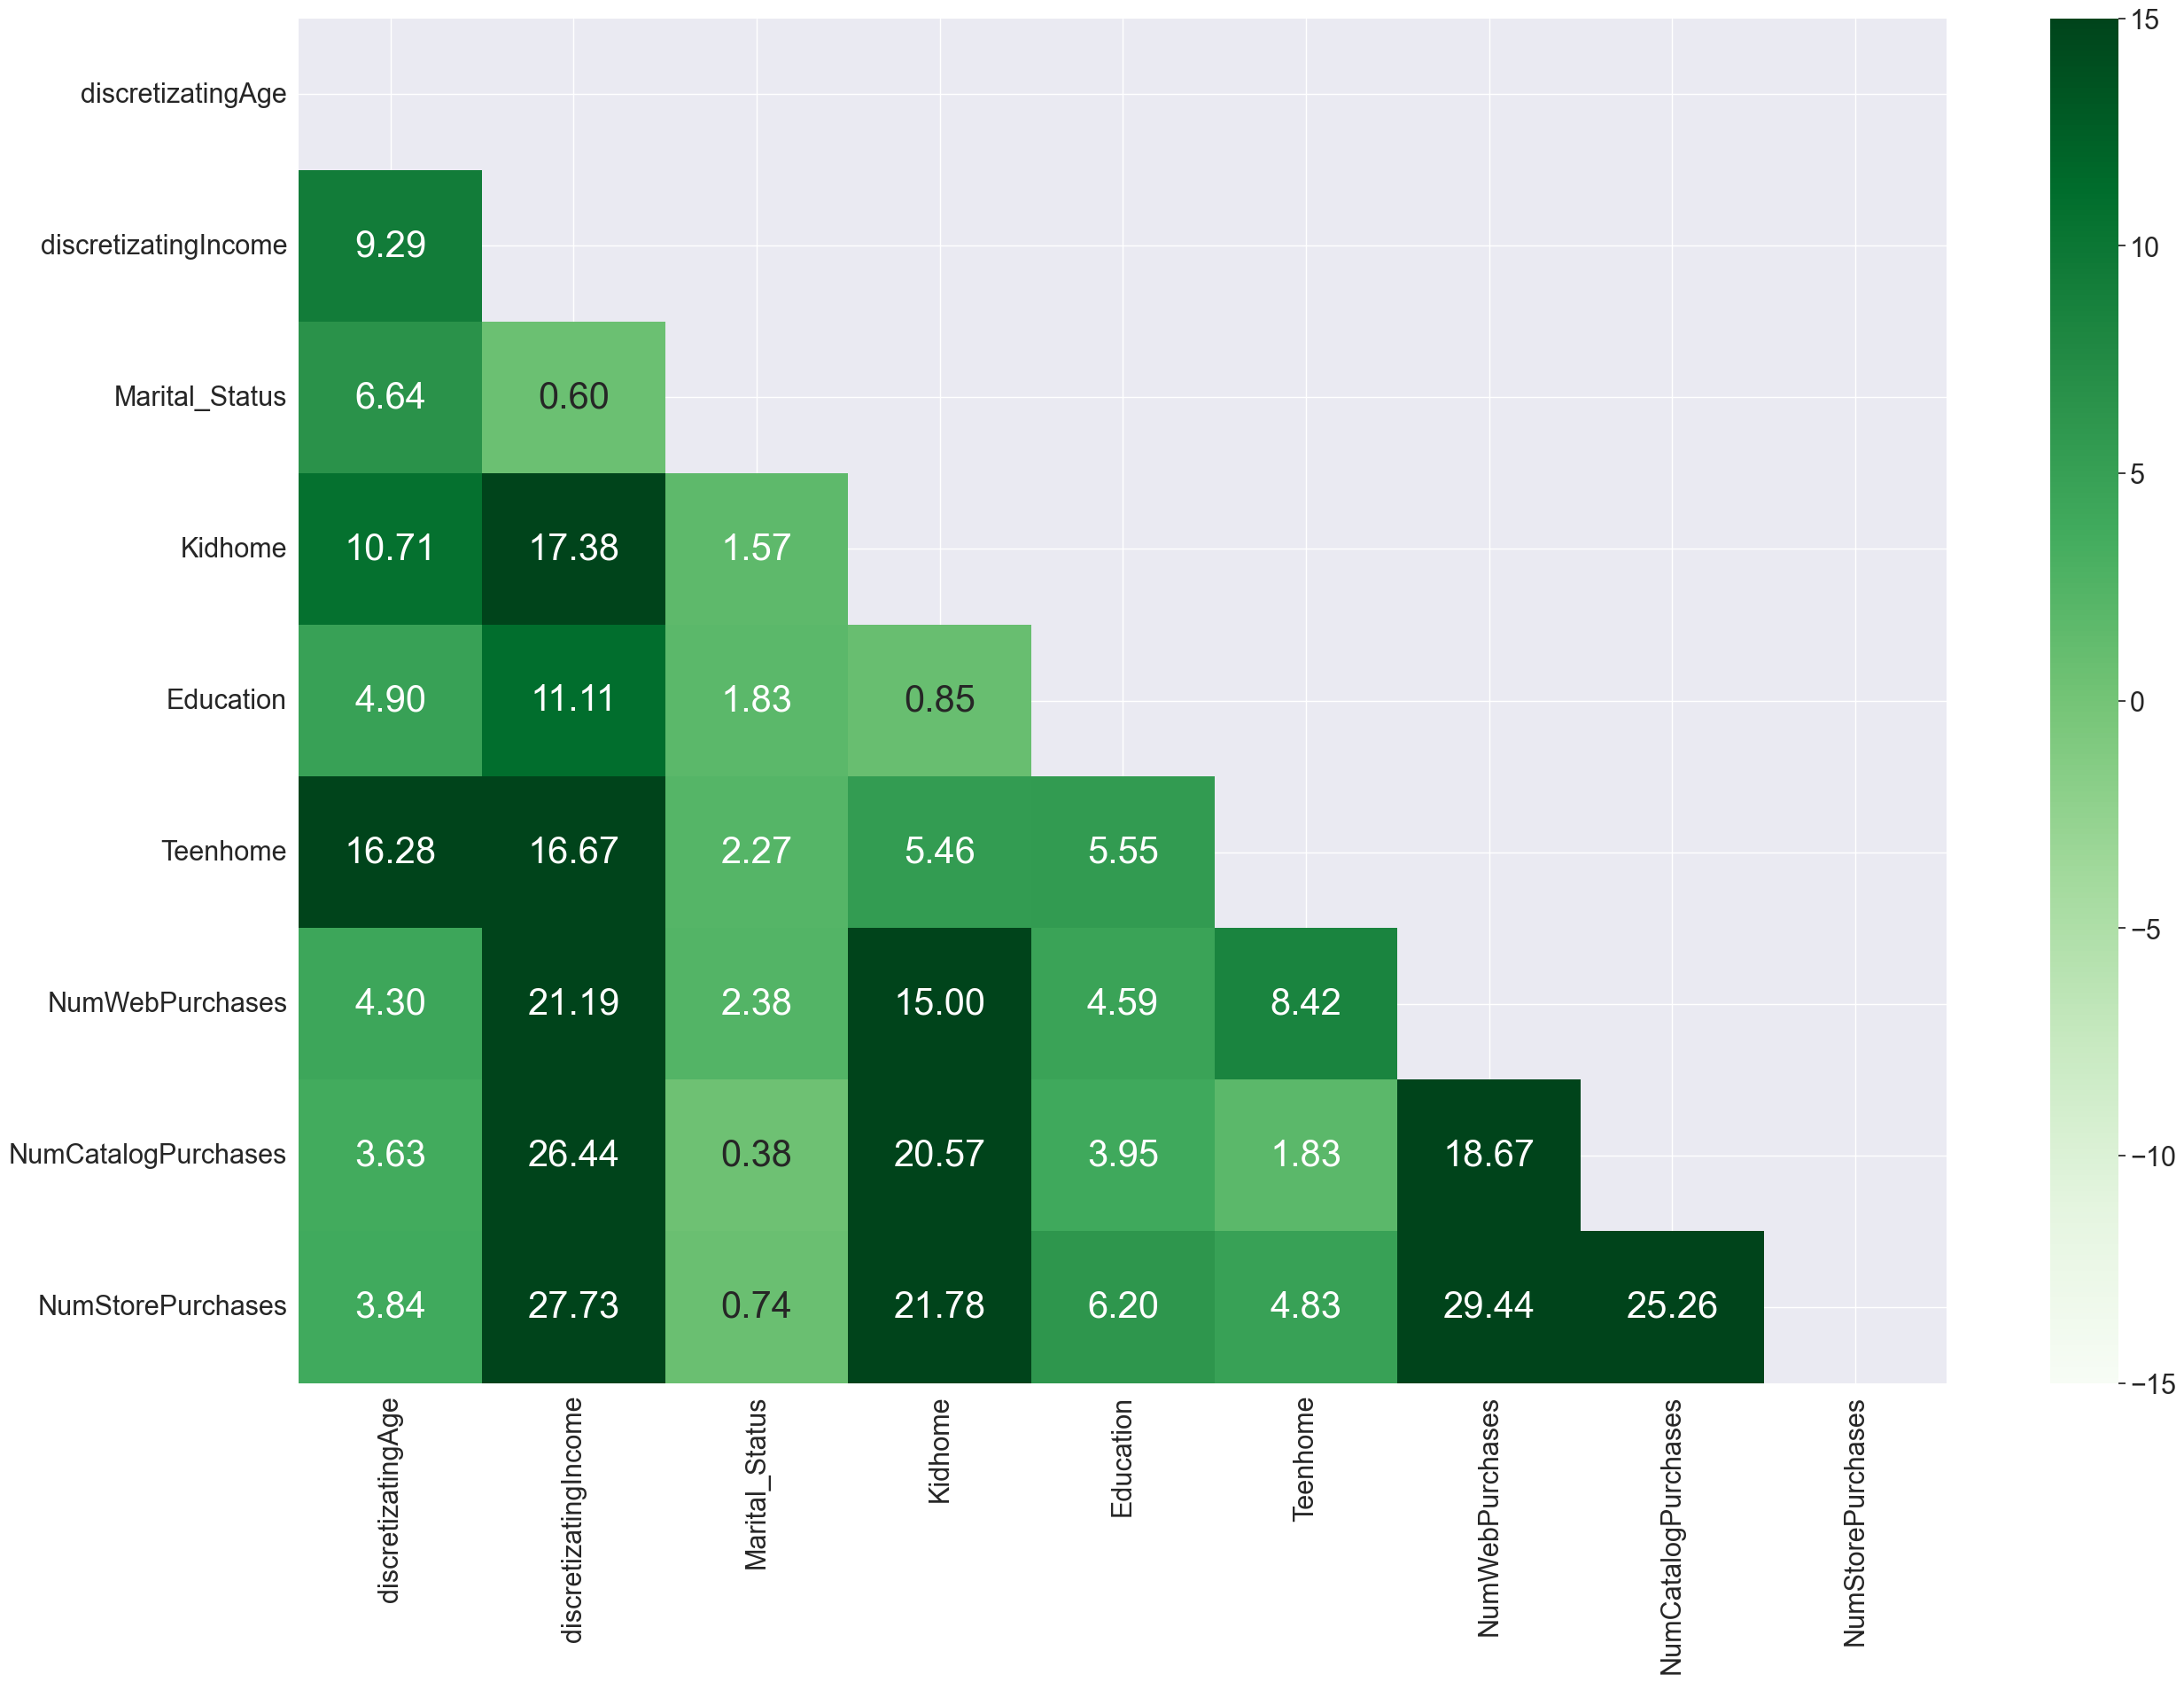

In [17]:
# Check the correlation and signification using phik 

# separating the column that we need beetween customer description(CD) and Place
dfCDPlace = dfNoAccCamp[['discretizatingAge', 'discretizatingIncome','Marital_Status', 'Kidhome','Education', 'Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
# heatmap of variable correlation 
fig, ax = plt.subplots(figsize=(30, 20))
phik_overview = dfCDPlace.phik_matrix()
corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="Blues", fmt='.2f', annot_kws={"fontsize":30})
sns.set(font_scale=2)
plt.show()

# heatmap of variable significance
fig, ax = plt.subplots(figsize=(30, 20))
significance_overview = dfCDPlace.significance_matrix()
corr_mask = np.triu(np.ones_like(significance_overview, dtype=bool))
sns.heatmap(significance_overview, mask=corr_mask, vmin=-15, vmax=15, annot=True, cmap="Greens", fmt='.2f', annot_kws={"fontsize":30})
sns.set(font_scale=2)
plt.show()


In [18]:
dfWeb = dfNoAccCamp[dfNoAccCamp['NumWebPurchases'] != 0]
dfWebCal = dfWeb.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'NumWebPurchases':'sum', 'ID' : 'count'})
dfWebCal.sort_values('NumWebPurchases', ascending=False)

NumWebPurchases   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome                    
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1                     169  \
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1                     144   
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1                     120   
Late middle-aged adults  $34948.5 - $67793.5  PhD        Married        0       1                     100   
                                              Graduation Together       0       1                      98   
...                                                                                                   ...   
Early middle-aged adults $0 - $34948.5        Basic      Married        0       1                       1   
                                                         Divorced       1       0                       1   
                                              Graduation Together       2       1                       1   
                                              Master     Divorced       0       0                       1   
                                              Basic      Single         1       1                       1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         28  
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         25  
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1         22  
Late middle-aged adults  $34948.5 - $67793.5  PhD        Married        0       1         19  
                                              Graduation Together       0       1         18  
...                                                                                       ..  
Early middle-aged adults $0 - $34948.5        Basic      Married        0       1          1  
                                                         Divorced       1       0          1  
                                              Graduation Together       2       1          1  
                                              Master     Divorced       0       0          1  
                                              Basic      Single         1       1          1  

[417 rows x 2 columns]

In [19]:
dfCatalog = dfNoAccCamp[dfNoAccCamp['NumCatalogPurchases'] != 0]
dfCatalogCal = dfCatalog.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'NumCatalogPurchases':'sum', 'ID' : 'count'})
dfCatalogCal.sort_values('NumCatalogPurchases', ascending=False)

NumCatalogPurchases   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome                        
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1                          89  \
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1                          80   
Early middle-aged adults > $67793.5           Graduation Married        0       0                          76   
Late middle-aged adults  $34948.5 - $67793.5  PhD        Married        0       1                          71   
Early middle-aged adults > $67793.5           Graduation Together       0       0                          65   
...                                                                                                       ...   
Older Adults             $0 - $34948.5        Graduation Married        1       1                           1   
                                                                        0       0                           1   
Early middle-aged adults $0 - $34948.5        PhD        Married        0       0                           1   
Late middle-aged adults  $0 - $34948.5        Master     Married        2       0                           1   
Among young              $0 - $34948.5        Basic      Married        0       0                           1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         23  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         25  
Early middle-aged adults > $67793.5           Graduation Married        0       0         12  
Late middle-aged adults  $34948.5 - $67793.5  PhD        Married        0       1         19  
Early middle-aged adults > $67793.5           Graduation Together       0       0          7  
...                                                                                       ..  
Older Adults             $0 - $34948.5        Graduation Married        1       1          1  
                                                                        0       0          1  
Early middle-aged adults $0 - $34948.5        PhD        Married        0       0          1  
Late middle-aged adults  $0 - $34948.5        Master     Married        2       0          1  
Among young              $0 - $34948.5        Basic      Married        0       0          1  

[340 rows x 2 columns]

In [20]:
dfStore = dfNoAccCamp[dfNoAccCamp['NumStorePurchases'] != 0]
dfStoreCal = dfStore.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'NumStorePurchases':'sum', 'ID' : 'count'})
dfStoreCal.sort_values('NumStorePurchases', ascending=False)

NumStorePurchases   
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome                      
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1                       201  \
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1                       191   
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1                       159   
Late middle-aged adults  $34948.5 - $67793.5  Graduation Together       0       1                       150   
                                              PhD        Married        0       1                       146   
...                                                                                                     ...   
                                              Graduation Widow          1       0                         2   
Early middle-aged adults > $67793.5           PhD        Together       1       1                         1   
Late middle-aged adults  $0 - $34948.5        PhD        Single         0       2                         1   
Older Adults             $0 - $34948.5        PhD        Together       0       1                         1   
Late middle-aged adults  > $67793.5           Master     Together       1       0                         1   

                                                                                          ID  
discretizatingAge        discretizatingIncome Education  Marital_Status Kidhome Teenhome      
Late middle-aged adults  $34948.5 - $67793.5  Graduation Married        0       1         28  
Early middle-aged adults $34948.5 - $67793.5  Graduation Married        0       1         25  
Older Adults             $34948.5 - $67793.5  Graduation Married        0       1         22  
Late middle-aged adults  $34948.5 - $67793.5  Graduation Together       0       1         18  
                                              PhD        Married        0       1         19  
...                                                                                       ..  
                                              Graduation Widow          1       0          1  
Early middle-aged adults > $67793.5           PhD        Together       1       1          1  
Late middle-aged adults  $0 - $34948.5        PhD        Single         0       2          1  
Older Adults             $0 - $34948.5        PhD        Together       0       1          1  
Late middle-aged adults  > $67793.5           Master     Together       1       0          1  

[421 rows x 2 columns]

In [21]:
# pd.set_option('display.max_columns', 50)
# dfCountWines = dfNoAccCamp[(dfNoAccCamp['discretizatingAge'] == 'Early middle-aged adults') & (dfNoAccCamp['discretizatingIncome'] == '$0 - $34948.5') & (dfNoAccCamp['Education'] == 'Graduation') & (dfNoAccCamp['Marital_Status'] == 'Married') & (dfNoAccCamp['Kidhome'] == 1) & (dfNoAccCamp['Teenhome'] == 0)]
# dfCountWines

In [22]:
a = pd.crosstab(df.discretizatingAge, df.discretizatingIncome)
a


discretizatingIncome,$0 - $34948.5,$34948.5 - $67793.5,> $67793.5
discretizatingAge,,,
Among young,40,18,33
Early middle-aged adults,265,321,170
Late middle-aged adults,188,476,210
Older Adults,54,305,160


In [23]:
Pa = (a.loc['Among young'].values.sum()/len(df))
Pba = (40/2240)/(Pa)

Prob = Pa*Pba
Prob*2240

40.0

In [24]:
def ExpectatedVals(a, x, y):
    sumRows = a[x].values.sum()
    sumCols = a.loc[y].values.sum()
    
    return sumRows, sumCols
    

In [25]:
Pa = (a.loc['Among young'].values.sum()/len(df))
Pb = (a['$0 - $34948.5'].values.sum()/len(df))
PAnB = Pa*Pb 
# peluang Among young berpenghasilan 0-34948.5
prob1 = Pa*((PAnB)/Pa)
prob1

0.009920479910714286

In [26]:
df.loc[(df.discretizatingIncome == '$0 - $34948.5') & (df.discretizatingAge == 'Among young')]

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept,discretizatingAge,discretizatingIncome
28,6864,1989,Master,34,Divorced,10979.0,0,0,2014-05-22,34,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
43,9909,1996,Master,27,Married,7500.0,0,0,2012-11-09,24,...,0,0,0,0,0,0,1,Accepted once or more,Among young,$0 - $34948.5
318,663,1989,PhD,34,Single,33996.0,0,0,2013-09-11,46,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
364,4459,1989,Graduation,34,Single,30279.0,1,0,2012-12-30,13,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
415,5987,1989,Master,34,Together,10404.0,1,0,2014-05-04,52,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
427,5012,1989,Graduation,34,Married,28691.0,1,0,2013-07-04,56,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
430,10642,1989,Graduation,34,Single,30279.0,1,0,2012-12-30,13,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
489,8151,1990,Basic,33,Married,24279.0,0,0,2012-12-29,6,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
495,3386,1992,Graduation,31,Married,34935.0,0,0,2013-06-21,71,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5
504,10203,1990,Graduation,33,Single,26095.0,1,0,2013-06-30,77,...,0,0,0,0,0,0,0,Never Accepted,Among young,$0 - $34948.5


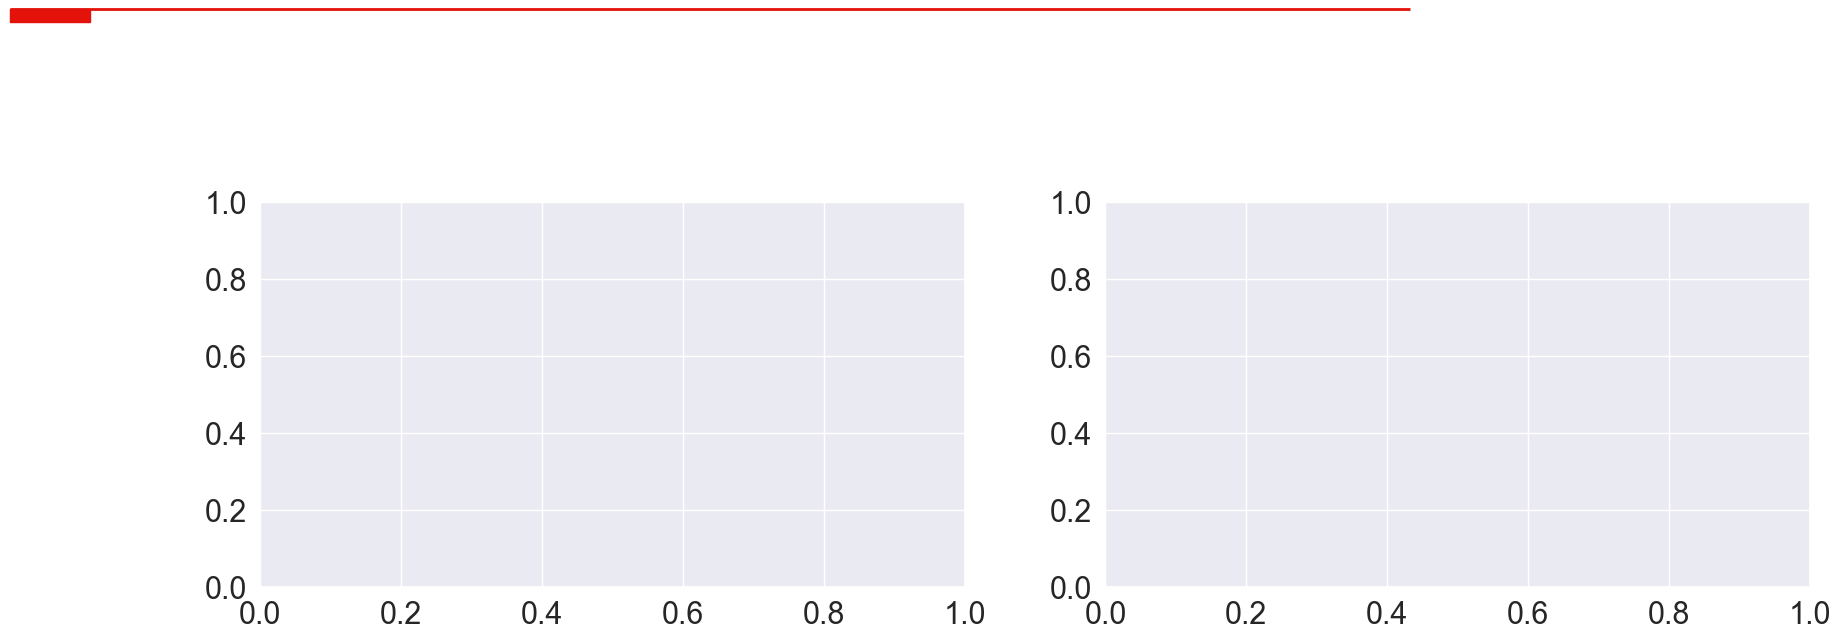

In [27]:
# Inisialisasi parameter gambar
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.7], [1.265, 1.265], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.24), 0.04, 0.025, color='#E3120B'))